## 泰坦尼克号存活人数预测
目标

预测一名乘客是否能够幸免于泰坦尼克号沉没。 对于测试集中的每个，必须预测变量的0或1值。

度量

您的分数是您正确预测的乘客百分比。这简称为“准确度”

In [3]:
import os
import urllib.request as req
import zipfile

FILE_NAME = "titanic.zip" 
DATA_PATH ="datasets/titanic"
DATA_URL = "https://raw.githubusercontent.com/oneking777/r-learn/master/projects/" + FILE_NAME + "?raw=true"

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_name=FILE_NAME):
    if not os.path.isdir(data_path): 
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, file_name)
    req.urlretrieve(data_url, zip_path) 
    data_zip = zipfile.ZipFile(zip_path)
    data_zip.extractall(path=data_path) 
    data_zip.close()
fetch_data()

In [54]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("datasets/titanic/train.csv")
test_df = pd.read_csv("datasets/titanic/test.csv")
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train_df.info()
# 含有缺失值字段：Age,Cabin,Embarked缺2个
# obj类型字段: Name, Sex, Ticket, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [56]:
test_df.info()
# 缺失值字段：Age,Fare缺少1个,Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [57]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [58]:
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vande Velde, Mr. Johannes Joseph",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A51A0147B8>,
      dtype=object)

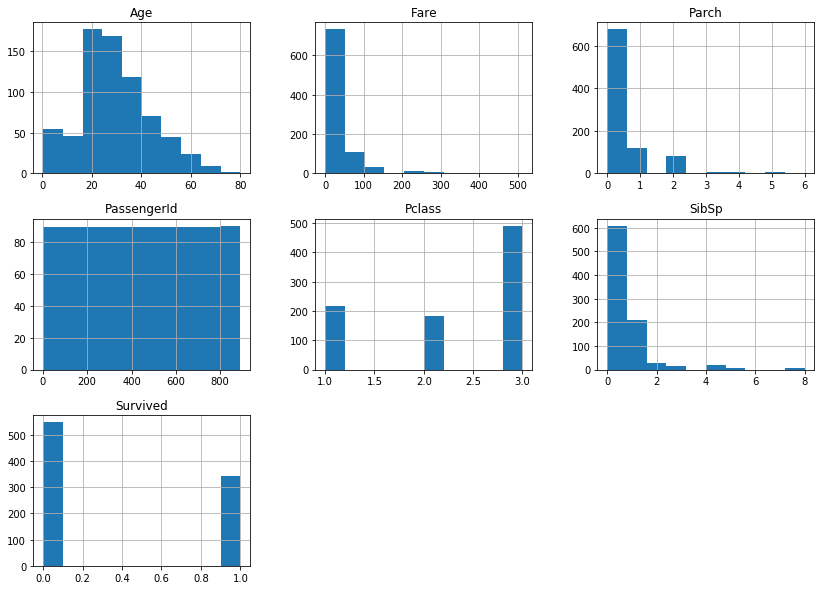

In [59]:
train_df.hist(figsize=(14, 10))

In [7]:
corr_mx = train_df.corr()

In [8]:
corr_mx["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [9]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)
# pclass 等级越高，存活率越大

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean()
# female的存活率要高于male

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"]).mean().sort_values(by="Survived", ascending=False)
# 有一个或两个兄弟姐妹的存活率要高于其他的

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [14]:
train_df[["Parch", "Survived"]].groupby(["Parch"]).mean().sort_values(by="Survived", ascending=False)
# parch数量小于等于三个时，存活率较高

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [16]:
train_df[["Embarked", "Survived"]].groupby(["Embarked"]).mean()
# 从c处上船的人存活率较高

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


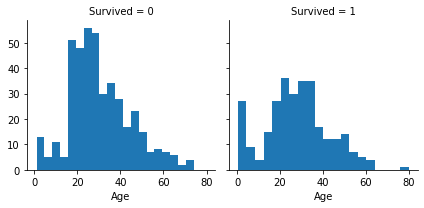

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt

g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Age", bins=20)    

C:\Users\1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


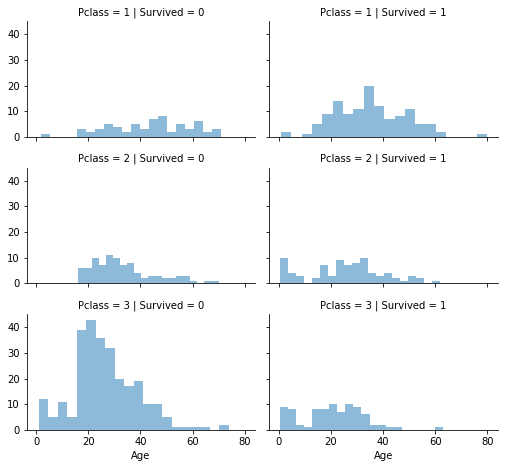

In [18]:
#age&Pclass 不同阶层不同年龄与生存的关系。将年龄和阶层进一步划分
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass", size=2.2, aspect=1.6) #size:图形大小 aspect：图形的纵横比
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend()
# pclass为1时存活率高于2和3
# pclass为2或3时，年龄小的存活率较高

C:\Users\1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


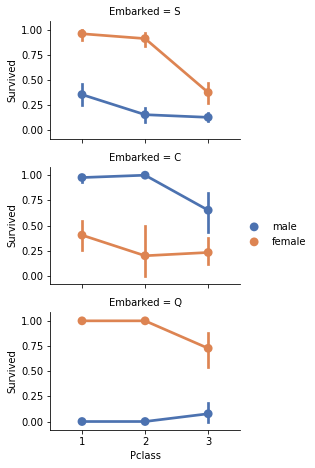

In [19]:
#将类目特征和目标值关联
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

数据清洗

In [21]:
# 删除无用特征
train_df = train_df.drop(["Ticket", "Cabin", "Name"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin", "Name"], axis=1)
combine = [train_df, test_df]
combine[0].shape

(891, 9)

In [22]:
# 将str特征转为数值型
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female": 1, "male": 0}).astype(int)
    
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [23]:
# 填充缺失值和空值
guess_age = np.zeros((2, 3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset["Sex"] == i) & (dataset["Pclass"] == j+1)]["Age"].dropna()
            age_guess = guess_df.median()
            guess_age[i, j] = int(age_guess/0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Sex == i) & (dataset.Pclass == j+1) & (dataset.Age.isnull()),"Age"] = guess_age[i, j]
            
    dataset["Age"] = dataset["Age"].astype(int)
    
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,S
1,2,1,1,1,38,1,0,71.2833,C
2,3,1,3,1,26,0,0,7.9250,S
3,4,1,1,1,35,1,0,53.1000,S
4,5,0,3,0,35,0,0,8.0500,S


In [24]:
# age离散化
train_df["AgeBand"] = pd.cut(train_df["Age"], 5)
train_df[["AgeBand", "Survived"]].groupby("AgeBand", as_index=False).mean().sort_values(by="AgeBand")

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [25]:
# 将区间转化为数字
for dataset in combine:    
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0 
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,1,0,3,0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,2,1,1,1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,3,1,3,1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,4,1,1,1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,5,0,3,0,2,0,0,8.0500,S,"(32.0, 48.0]"


In [26]:
train_df = train_df.drop(["AgeBand"], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,7.2500,S
1,2,1,1,1,2,1,0,71.2833,C
2,3,1,3,1,1,0,0,7.9250,S
3,4,1,1,1,2,1,0,53.1000,S
4,5,0,3,0,2,0,0,8.0500,S


In [27]:
# 建立新特征familyzise
for dataset in combine:
    dataset["familysize"] = dataset["SibSp"] + dataset["Parch"] + 1
train_df[["familysize", "Survived"]].groupby(["familysize"], \
                                             as_index=False).mean().sort_values(by="Survived", ascending=False)

,familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [28]:
# 建立新特征isalone
for dataset in combine:
    dataset["isalone"] = 0
    dataset.loc[dataset["familysize"] ==1, "isalone"] = 1
train_df[["isalone", "Survived"]].groupby(["isalone"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,isalone,Survived
0,0,0.505650
1,1,0.303538


In [29]:
# 放弃使用SibSp， Parch， familysize 没有太大的规律
train_df = train_df.drop(["SibSp", "Parch", "familysize"], axis=1)
test_df = test_df.drop(["SibSp", "Parch", "familysize"], axis=1)

In [30]:
# 创建age*pclass特征
train_df["age*pclass"] = train_df.Age * train_df.Pclass
test_df["age*pclass"] = test_df.Age * test_df.Pclass
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,isalone,age*pclass
0,1,0,3,0,1,7.2500,S,0,3
1,2,1,1,1,2,71.2833,C,0,2
2,3,1,3,1,1,7.9250,S,1,3
3,4,1,1,1,2,53.1000,S,0,2
4,5,0,3,0,2,8.0500,S,1,6
5,6,0,3,0,1,8.4583,Q,1,3
6,7,0,1,0,3,51.8625,S,1,3
7,8,0,3,0,0,21.0750,S,0,0
8,9,1,3,1,1,11.1333,S,0,3
9,10,1,2,1,0,30.0708,C,0,0


In [31]:
# 处理Embarked特征
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [32]:
train_df["Embarked"] = train_df["Embarked"].fillna(freq_port)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null int32
Fare           891 non-null float64
Embarked       891 non-null object
isalone        891 non-null int64
age*pclass     891 non-null int64
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


In [33]:
train_df["Embarked"] = train_df["Embarked"].map({"S":0, "C":1,"Q":2}).astype(int)
test_df["Embarked"] = test_df["Embarked"].map({"S":0, "C":1,"Q":2}).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,isalone,age*pclass
0,1,0,3,0,1,7.2500,0,0,3
1,2,1,1,1,2,71.2833,1,0,2
2,3,1,3,1,1,7.9250,0,1,3
3,4,1,1,1,2,53.1000,0,0,2
4,5,0,3,0,2,8.0500,0,1,6


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null int32
Fare           891 non-null float64
Embarked       891 non-null int32
isalone        891 non-null int64
age*pclass     891 non-null int64
dtypes: float64(1), int32(3), int64(5)
memory usage: 52.3 KB


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           417 non-null float64
Embarked       418 non-null int32
isalone        418 non-null int64
age*pclass     418 non-null int64
dtypes: float64(1), int32(3), int64(4)
memory usage: 21.3 KB


In [36]:
fare_median = test_df["Fare"].dropna().median()
fare_median

14.4542

In [37]:
test_df["Fare"] = test_df["Fare"].fillna(fare_median)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null float64
Embarked       418 non-null int32
isalone        418 non-null int64
age*pclass     418 non-null int64
dtypes: float64(1), int32(3), int64(4)
memory usage: 21.3 KB


In [38]:
train_df["FareBand"] = pd.qcut(train_df["Fare"], 5)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,isalone,age*pclass,FareBand
0,1,0,3,0,1,7.2500,0,0,3,"(-0.001, 7.854]"
1,2,1,1,1,2,71.2833,1,0,2,"(39.688, 512.329]"
2,3,1,3,1,1,7.9250,0,1,3,"(7.854, 10.5]"
3,4,1,1,1,2,53.1000,0,0,2,"(39.688, 512.329]"
4,5,0,3,0,2,8.0500,0,1,6,"(7.854, 10.5]"


In [39]:
train_df[["FareBand", "Survived"]].groupby(["FareBand"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,FareBand,Survived
4,"(39.688, 512.329]",0.642045
3,"(21.679, 39.688]",0.444444
2,"(10.5, 21.679]",0.424419
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087


In [40]:
train_df["Fare"] = train_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)
combine = [train_df, test_df]

In [41]:
for dataset in combine:
    dataset.loc[dataset["Fare"]<=7.854, "Fare"] = 0
    dataset.loc[(dataset["Fare"]>7.854)&(dataset["Fare"]<=10.5), "Fare"] = 1
    dataset.loc[(dataset["Fare"]>10.5)&(dataset["Fare"]<=21.679), "Fare"] = 2
    dataset.loc[(dataset["Fare"]>21.679)&(dataset["Fare"]<=39.688), "Fare"] = 3
    dataset.loc[(dataset["Fare"]>39.688)&(dataset["Fare"]<=512.329), "Fare"] = 4
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,isalone,age*pclass,FareBand
0,1,0,3,0,1,0,0,0,3,"(-0.001, 7.854]"
1,2,1,1,1,2,4,1,0,2,"(39.688, 512.329]"
2,3,1,3,1,1,0,0,1,3,"(7.854, 10.5]"
3,4,1,1,1,2,4,0,0,2,"(39.688, 512.329]"
4,5,0,3,0,2,1,0,1,6,"(7.854, 10.5]"


In [42]:
train_df = train_df.drop(["FareBand"], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,isalone,age*pclass
0,1,0,3,0,1,0,0,0,3
1,2,1,1,1,2,4,1,0,2
2,3,1,3,1,1,0,0,1,3
3,4,1,1,1,2,4,0,0,2
4,5,0,3,0,2,1,0,1,6


In [43]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,isalone,age*pclass
0,892,3,0,2,0,2,1,6
1,893,3,1,2,0,0,0,6
2,894,2,0,3,1,2,1,6
3,895,3,0,1,1,0,1,3
4,896,3,1,1,2,0,0,3


模型和预测

In [44]:
import time
from sklearn.model_selection import cross_validate

class Tester(object):
    def __init__(self, target):
        self.target = target
        self.datasets = {}
        self.models = {}
        self.cache = {}  

    def addDataset(self, name, df):
        self.datasets[name] = df.copy()

    def addModel(self, name, model):
        self.models[name] = model

    def clearModels(self):
        self.models = {}

    def clearCache(self):
        self.cache = {}

    def testModelWithDataset(self, m_name, df_name, sample_len, cv):
        if (m_name, df_name, sample_len, cv) in self.cache:
            return self.cache[m_name, df_name, sample_len, cv]

        clf = self.models[m_name]

        if not sample_len:
            sample = self.datasets[df_name]
        else:
            sample = self.datasets[df_name].sample(sample_len)

        X = sample.drop([self.target], axis=1)
        Y = sample[self.target]

        s = cross_validate(clf, X, Y, scoring=["precision"], cv=cv, n_jobs=-1)
        self.cache[(m_name, df_name, sample_len, cv)] = s
        return s

    def runTests(self, sample_len=891, cv=4):
        scores = {}
        for m_name in self.models:
            for df_name in self.datasets:
                print("Testing %s" % str((m_name, df_name)), end='')

                start = time.time()
                score = self.testModelWithDataset(m_name, df_name, sample_len, cv)
                scores[(m_name, df_name, sample_len, cv)] = score
                end = time.time()

                print(' -- %0.2fs ' % (end - start))

        print("----TOP 10 RESULT----")
        for score in sorted(scores.items(), key=lambda x: -1 * x[1]['test_precision'].mean())[:10]:
            pre = score[1]['test_precision']
            print("%s --> PRECISION: %0.4f (+/- %0.4f)" % (str(score[0]), pre.mean(), pre.std()))

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
gs_clf = GaussianNB()
lin_svc = LinearSVC()
sgd_clf = SGDClassifier()
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# 添加模型
tester = Tester("Survived")
tester.addModel("log_reg", log_reg)
tester.addModel("svc_clf", svc_clf)
tester.addModel("knn_clf", knn_clf)
tester.addModel("gs_clf", gs_clf)
tester.addModel("lin_svc", lin_svc)
tester.addModel("sgd_clf", sgd_clf)
tester.addModel("tree_clf", tree_clf)
tester.addModel("rf_clf", rf_clf)

# 添加数据
tester.addDataset("train", train_df)

tester.runTests(cv=10)

Testing ('log_reg', 'train') -- 8.02s 
Testing ('svc_clf', 'train') -- 0.60s 
Testing ('knn_clf', 'train') -- 0.30s 
Testing ('gs_clf', 'train') -- 0.09s 
Testing ('lin_svc', 'train') -- 0.48s 
Testing ('sgd_clf', 'train') -- 0.11s 
Testing ('tree_clf', 'train') -- 0.22s 
Testing ('rf_clf', 'train') -- 0.26s 
----TOP 10 RESULT----
('rf_clf', 'train', 891, 10) --> PRECISION: 0.7524 (+/- 0.0692)
('log_reg', 'train', 891, 10) --> PRECISION: 0.7437 (+/- 0.0481)
('lin_svc', 'train', 891, 10) --> PRECISION: 0.7098 (+/- 0.1622)
('tree_clf', 'train', 891, 10) --> PRECISION: 0.6854 (+/- 0.0460)
('gs_clf', 'train', 891, 10) --> PRECISION: 0.5417 (+/- 0.0638)
('svc_clf', 'train', 891, 10) --> PRECISION: 0.5007 (+/- 0.0718)
('sgd_clf', 'train', 891, 10) --> PRECISION: 0.4916 (+/- 0.3374)
('knn_clf', 'train', 891, 10) --> PRECISION: 0.4818 (+/- 0.0773)


In [49]:
# 随即森林得分值较高
x_train = train_df.drop(["Survived"], axis=1)
y_train = train_df["Survived"]
x_test = test_df

rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })

submission.to_csv('submission.csv', index=False)